In [0]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.axes._axes import _log as matplotlib_axes_logger# reduce the error level
matplotlib_axes_logger.setLevel('ERROR')

In [9]:
# clean the lyrics
# require lyrics.csv
# remove all nan rows and strange characters in lyrics colounm
# return clean df, ATTENTION: only renturn necessary column!
def clean_lyrics():
  usecols = ['year','genre','lyrics']
  song = pd.read_csv("/content/drive/My Drive/NLP/W4/lyrics.csv",usecols=usecols)
  song=song[song.year>1000]
  #song=song.dropna(subset=['genre'])
  song = song[song.genre != "Not Available"]
  clean_song=song.dropna(subset=['lyrics']).replace({'lyrics': '[^A-Za-z ]',} ,' ', regex=True)
  #clean_song = song.replace({'lyrics': '[^A-Za-z ]',} ,' ', regex=True)
  clean_song['lyrics'] = clean_song['lyrics'].str.upper().str.split()
  #clean_song['lyrics'] = clean_song['lyrics'].str.split()
  return clean_song
song=clean_lyrics()
song


,year,genre,lyrics
0,2009,Pop,"[OH, BABY, HOW, YOU, DOING, YOU, KNOW, I, M, G..."
1,2009,Pop,"[PLAYIN, EVERYTHING, SO, EASY, IT, S, LIKE, YO..."
2,2009,Pop,"[IF, YOU, SEARCH, FOR, TENDERNESS, IT, ISN, T,..."
3,2009,Pop,"[OH, OH, OH, I, OH, OH, OH, I, VERSE, IF, I, W..."
4,2009,Pop,"[PARTY, THE, PEOPLE, THE, PEOPLE, THE, PARTY, ..."
...,...,...,...
362232,2012,Country,"[I, GOTTA, SAY, BOY, AFTER, ONLY, JUST, A, COU..."
362233,2012,Country,"[I, HELPED, YOU, FIND, HER, DIAMOND, RING, YOU..."
362234,2012,Country,"[LOOK, AT, THE, COUPLE, IN, THE, CORNER, BOOTH..."
362235,2012,Country,"[WHEN, I, FLY, OFF, THIS, MORTAL, EARTH, AND, ..."


In [0]:
# count the time of the word  appear in lyrics
# and in the 2 emotional lists
def count_pos(x):
  set_pos = set(x)&set(pos)
  set_neg = set(x)&set(neg)
  # ATTENTION! do the reduce the runing time, the total score of each calculate here!
  s=0
  for item in set_pos:
    s+=x.count(item)
  for item in set_neg:
    s-=x.count(item)
  return s

In [0]:
# create 2 list of word one pos one neg
# this function is require for inquireraugmented.xls
# more info search Harvard IV-4
def creat_dic():
  dic=pd.read_excel("/content/drive/My Drive/NLP/W4/inquireraugmented.xls",encoding='utf-8')
  dic=dic.loc[:,['Entry','Positiv','Negativ']]#select necessry coloumn
  dic1=dic.dropna(thresh=2)#remove rows are no emotion
  dic1=dic1.dropna(subset=['Entry']).replace({'Entry': '[^A-Za-z]',} ,'', regex=True)#remove entry value nan
  #dic1.replace({'Entry': '[^A-Za-z]',} ,'', regex=True)
  pos_dic=dic1[dic1.Positiv == 'Positiv']
  #neg_dic=dic1[dic1.Negativ == 'Negativ']
  Pos_list =dic1[dic1.Positiv == 'Positiv']['Entry'].tolist()
  Neg_list =dic1[dic1.Negativ == 'Negativ']['Entry'].tolist()
  #for rows in pos_dic.itertuples(): 
    #Pos_list.append(re.sub(r'[^A-Z]*', '', rows.Entry)) #remove character
  #for rows in neg_dic.itertuples(): 
    #Neg_list.append(re.sub(r'[^A-Z]*', '', str(rows.Entry))) #unknow why we have no string in this
  return [Pos_list, Neg_list]
pos,neg=creat_dic()
 
##may try to use oop method
# performace improved

In [12]:
#function sentiment_scorer
#Uses user-supplied list to gauge sentiment on an
#arbitrary piece of text.
##inputs:
#data frame include lyrics
#it will compare with the dicnory 
#output:
#data frame include total score
#Attention:it tooks a long time for the duplicate for loop
#It is different from the assginment requirement, it dont add Neg and Postitive column
#To improve performance it is necessary
def sentiment_scorer(song):
  pos,neg=creat_dic()
  song["Total"] = song["lyrics"].apply(lambda x :count_pos(x))
  #song["cn"] = song["lyrics"].apply(count_neg)
  #song['avg'] = song[['cp', 'cn']].mean(axis=1)
  return song
song=sentiment_scorer(song)
song

,year,genre,lyrics,Total
0,2009,Pop,"[OH, BABY, HOW, YOU, DOING, YOU, KNOW, I, M, G...",18
1,2009,Pop,"[PLAYIN, EVERYTHING, SO, EASY, IT, S, LIKE, YO...",9
2,2009,Pop,"[IF, YOU, SEARCH, FOR, TENDERNESS, IT, ISN, T,...",6
3,2009,Pop,"[OH, OH, OH, I, OH, OH, OH, I, VERSE, IF, I, W...",44
4,2009,Pop,"[PARTY, THE, PEOPLE, THE, PEOPLE, THE, PARTY, ...",4
...,...,...,...,...
362232,2012,Country,"[I, GOTTA, SAY, BOY, AFTER, ONLY, JUST, A, COU...",4
362233,2012,Country,"[I, HELPED, YOU, FIND, HER, DIAMOND, RING, YOU...",1
362234,2012,Country,"[LOOK, AT, THE, COUPLE, IN, THE, CORNER, BOOTH...",3
362235,2012,Country,"[WHEN, I, FLY, OFF, THIS, MORTAL, EARTH, AND, ...",18


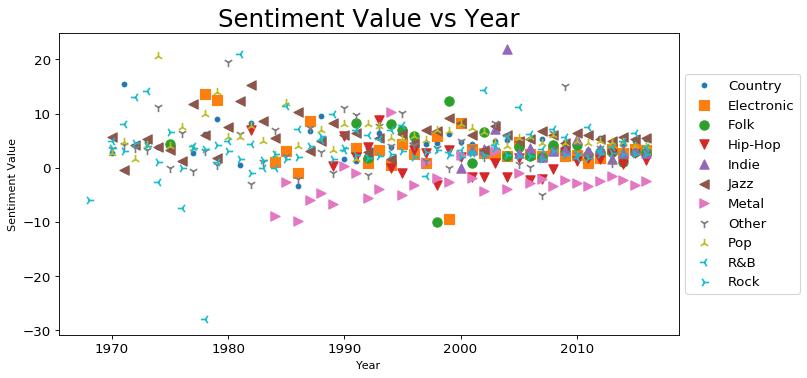

In [38]:
# draw a plot with colours 
acc = song.groupby(["year", "genre"], as_index=False)['Total'].mean()
# Prepare Data 
# Create as many colors as there are unique midwest['category']
categories = np.unique(acc['genre'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]
markers=['.',',','o','v','^','<','>','1','2','3','4','8','s','p','P','*','h','H','+','x','X','D','d','|','_']
# Draw Plot for Each Category
plt.figure(figsize=(10,5), dpi= 80, facecolor='w', edgecolor='k')
for i, category in enumerate(categories):
    plt.scatter('year', "Total",data=acc.loc[acc.genre==category, :], marker=markers[i], s=70, c=colors[i], label=str(category))
plt.gca().set(xlabel='Year', ylabel='Sentiment Value')
plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Sentiment Value vs Year", fontsize=22)
plt.legend(fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5))    
plt.show()    

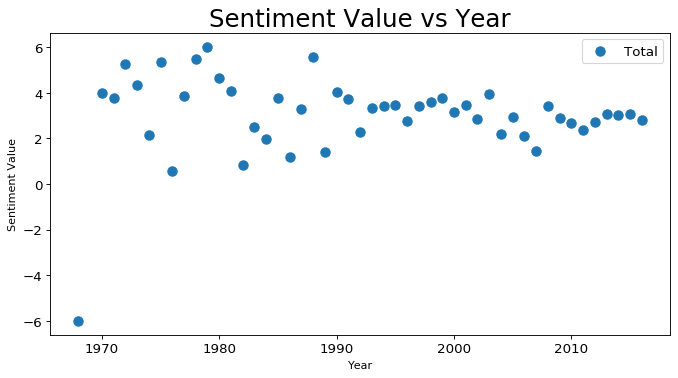

In [32]:
#draw plot by year mean
acc = song.groupby(["year"], as_index=False)['Total'].mean()
plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter('year', "Total",data=acc,  s=70)
plt.gca().set(xlabel='Year', ylabel='Sentiment Value')
plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Sentiment Value vs Year", fontsize=22)
plt.legend(fontsize=12)    
plt.show()    

## Executive Summary
In this project we analyze the sentiment of the song from 1965 to 2015, we analyze the sentiment by count the word from the sentiment dictionary in the lyrics, from the result we found Jazz and rock music are usually have more positive sentiments than Metal.
Introduction
Overall, we want to analyze the sentiment of each kind of song and to see if the year will affect the song’s sentiment.
The data set we use is the MetroLyrics dataset which included the information of Songs and Harvard IV-4 dictionary which can provide us the sentiment information of a word.
##Methodology
First I do some clean work to reduce data set size, the MetroLyrics data set include more than 250000 rows, to reduce the data frame size I drop all the rows with NA value in lyrics column, year and genre column. After select and clean work we got a data frame with 3 columns: year, genre, lyrics, with 242610 rows. (see the code chunk: clean the lyrics)  
Also, I split the lyrics column’s value from string type to list type, removed all the non-character symbols. To the Harvard IV-4 dictionary, I only keep the column with sentiments and store them into 2 lists.(see the code chunk: create 2 lists of word one pos one neg)  
When we analyze the sentiments since there are no sentiments weight provide us in the dictionary, we assumed that: each positive word equals 1 score and negative word equal -1 score.  
Equations are list below:  
Score =positive number -negative number
##Result
From the plot, we can see most of the songs are valued around 5 to 10 which is quite close to the result of Dodds and Danforth’s paper, due lyrics data set are different, the plots are different from original one, but the general result is similar and the metal has the most negative emotion of all kinds of songs and Pop is also very negative. But we still need to clarify that it is not a good algorithm to calculate the song’s sentiment. Each weight of the word in the dictionary is equal to 1 or -1, which is different in the real world, like happy and excellent have a different emotion. A possible improvement algorithm is to add weight to each word, calculate the percentage of the negative and positive word after removed the stop word in lyrics.


